## Importing Required Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer
from tensorflow.keras.optimizers import Adam
sns.set(style="darkgrid")

## Importing Amazon One Plus Data

In [2]:
file_path = r"D:\\Paper Dataset\\amazon_one_plus_reviews.json"
df = pd.read_json(file_path)

# Extract the numeric rating and convert to float
df['numeric_rating'] = df["review_rating"].str.extract(r'([0-9]+\.?[0-9]*)').astype(float)

# Function to convert ratings
def convert_rating(rating):
    if rating >= 4.0:
        return 'positive'
    elif rating == 3.0:
        return 'neutral'
    else:
        return 'negative'

# Apply the function to the rating column
df['categorical_rating'] = df['numeric_rating'].apply(convert_rating)

amazon_df = df[['categorical_rating', 'review_text']]
print(amazon_df.shape)
print(amazon_df['categorical_rating'].value_counts())
amazon_df.head()

(30612, 2)
categorical_rating
positive    22504
neutral      4172
negative     3936
Name: count, dtype: int64


,categorical_rating,review_text
0,positive,"\n Yea..pre-ordered on 28 July, got it on 4 A..."
1,positive,"\n Got it delivered yesterday , used for abou..."
2,positive,\n An amazing phone!
3,positive,\n Brilliant..
4,positive,\n I was skeptical about changing from One pl...


## Importing Iphone Data

In [3]:
file_path = r"D:\\Paper Dataset\\apple_iphone_11_reviews.json"
df = pd.read_json(file_path)

# Extract the numeric rating and convert to float
df['numeric_rating'] = df["review_rating"].str.extract(r'([0-9]+\.?[0-9]*)').astype(float)

# Function to convert ratings
def convert_rating(rating):
    if rating >= 4.0:
        return 'positive'
    elif rating == 3.0:
        return 'neutral'
    else:
        return 'negative'

# Apply the function to the rating column
df['categorical_rating'] = df['numeric_rating'].apply(convert_rating)

iphone_df = df[['categorical_rating', 'review_text']]
print(iphone_df.shape)
print(iphone_df['categorical_rating'].value_counts())
iphone_df.head()

(5010, 2)
categorical_rating
positive    4451
negative     406
neutral      153
Name: count, dtype: int64


,categorical_rating,review_text
0,neutral,NOTE:
1,negative,Very bad experience with this iPhone xr phone....
2,positive,Amazing phone with amazing camera coming from ...
3,negative,So I got the iPhone XR just today. The product...
4,positive,I've been an android user all my life until I ...


## Importing K8 Data

In [4]:
file_path = r"D:\\Paper Dataset\\K8 Reviews v0.2.csv"
df = pd.read_csv(file_path)
df = df.rename(columns={'review': 'review_text'})
df['categorical_rating'] = df['sentiment'].replace({1: 'positive', 0: 'negative'})
df['categorical_rating'] = df['categorical_rating'].astype(str)

k8_df = df[['categorical_rating', 'review_text']]
print(k8_df.shape)
print(k8_df['categorical_rating'].value_counts())
k8_df.head()

(14675, 2)
categorical_rating
negative    7712
positive    6963
Name: count, dtype: int64


,categorical_rating,review_text
0,positive,Good but need updates and improvements
1,negative,"Worst mobile i have bought ever, Battery is dr..."
2,positive,when I will get my 10% cash back.... its alrea...
3,positive,Good
4,negative,The worst phone everThey have changed the last...


## Merge All Dfs

In [5]:
merged_df = pd.concat([amazon_df, iphone_df, k8_df], axis=0)

# Reset the index of the merged DataFrame, if needed
merged_df = merged_df.reset_index(drop=True)

print(merged_df['categorical_rating'].value_counts())
print(merged_df.shape)
merged_df.head()

categorical_rating
positive    33918
negative    12054
neutral      4325
Name: count, dtype: int64
(50297, 2)


,categorical_rating,review_text
0,positive,"\n Yea..pre-ordered on 28 July, got it on 4 A..."
1,positive,"\n Got it delivered yesterday , used for abou..."
2,positive,\n An amazing phone!
3,positive,\n Brilliant..
4,positive,\n I was skeptical about changing from One pl...


## Display Word Cloud

In [8]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chetouani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

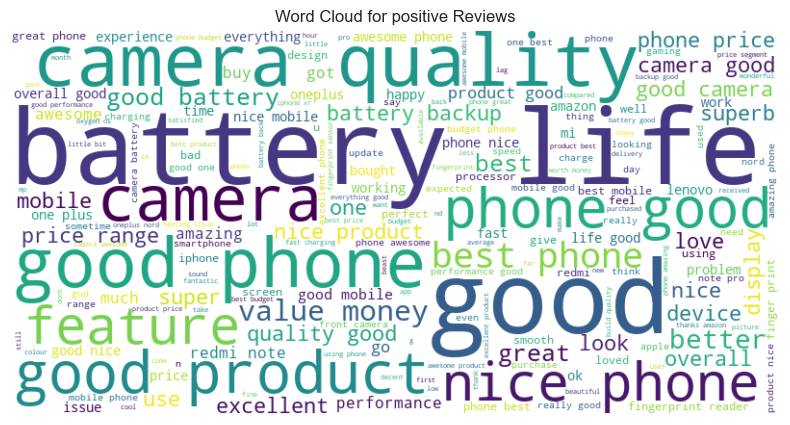

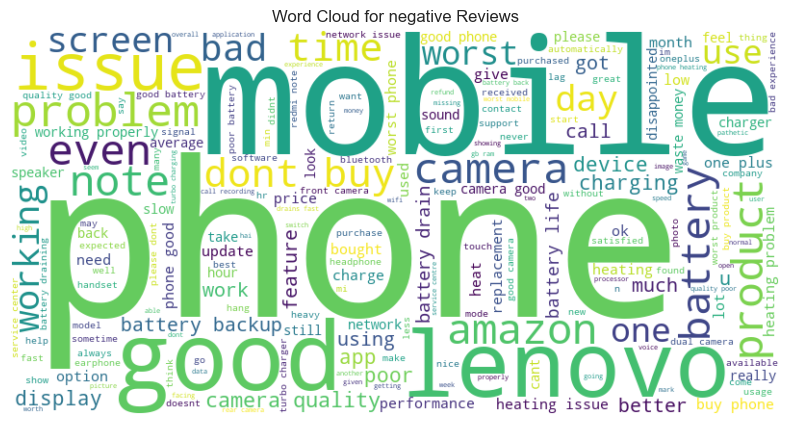

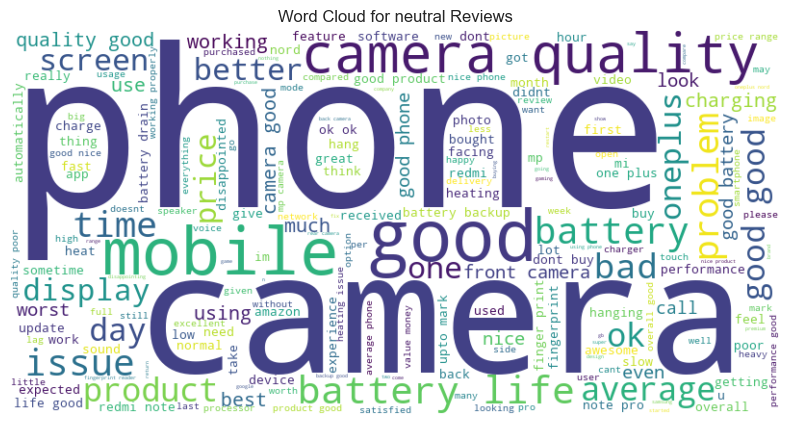

In [9]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    text = ' '.join(words)
    return text

# Loop through each unique category in the 'categorical_rating' column
for category in merged_df['categorical_rating'].unique():
    # Filter the DataFrame for the category
    category_df = merged_df[merged_df['categorical_rating'] == category]
    # Concatenate all review texts for the category
    all_reviews = ' '.join(category_df['review_text'].apply(preprocess_text))
    # Generate a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {category} Reviews')
    plt.show()

## Topic Modeling

In [10]:
from sentence_transformers import SentenceTransformer

# Initialize the model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Function to generate embeddings
def generate_embeddings(texts):
    return model.encode(texts, show_progress_bar=True)

# Generate embeddings for each category
categories = merged_df['categorical_rating'].unique()
category_embeddings = {}
for category in categories:
    texts = merged_df[merged_df['categorical_rating'] == category]['review_text'].tolist()
    embeddings = generate_embeddings(texts)
    category_embeddings[category] = embeddings


pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

C:\Users\Chetouani\anaconda3\envs\py310pt\lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Chetouani\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
C:\Users\Chetouani\anaconda3\envs\py310pt\lib\site-packages\torch\_utils.py:831: UserWarning: TypedStorage is deprecated. It wil

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1060 [00:00<?, ?it/s]

Batches:   0%|          | 0/377 [00:00<?, ?it/s]

Batches:   0%|          | 0/136 [00:00<?, ?it/s]

In [14]:
from sklearn.cluster import KMeans

def cluster_embeddings(embeddings, n_clusters=5):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(embeddings)
    return kmeans.labels_, kmeans.cluster_centers_

# Cluster embeddings for each category
category_clusters = {}
for category, embeddings in category_embeddings.items():
    labels, centers = cluster_embeddings(embeddings, n_clusters=7)  # Adjust n_clusters as needed
    category_clusters[category] = (labels, centers)


C:\Users\Chetouani\anaconda3\envs\py310pt\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Chetouani\anaconda3\envs\py310pt\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Chetouani\anaconda3\envs\py310pt\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [15]:
import numpy as np

def interpret_clusters(category, labels, centers, texts):
    print(f"Category: {category}")
    for i, center in enumerate(centers):
        distances = np.linalg.norm(embeddings - center, axis=1)
        closest_indices = distances.argsort()[:7]  # Get 5 closest texts
        closest_texts = np.array(texts)[closest_indices]
        print(f"\nTopic {i+1}:")
        print("\n".join(closest_texts))

# Interpret clusters for each category
for category, (labels, centers) in category_clusters.items():
    texts = merged_df[merged_df['categorical_rating'] == category]['review_text'].tolist()
    interpret_clusters(category, labels, centers, texts)


Category: positive

Topic 1:

  Good


  Performance of Mobile is satisfactory, Battery could hve been better


  Never disappointed 💪


  Super duper product


  Good but processor can be atleast 855


  It is up to my expectations


  Overall good experience with my new OnePlus Nord mobile and draw back is camera quality is not so good.


Topic 2:

  Nice and beautiful


  Good camera , battery life** low


  the phone is so smooth

  Worth every penny!


  Prepaid preorder. Received Before launch. Thankou Amazon.


  forget all, just purchase it...


  Definitely go for it without any doubt.


Topic 3:

  Super smooth experience.. no lag or delay.. charging speed is lighting fast...60% recharge happens in 30 mins..Very good phone.. overall Scores 9 out of 10.. considering performance, display quality, battery life , camera, future ready..


  An awesome phone!!!!!


  Loved the new Nord! I bought the blue one at around 22k with all possible discounts. Great value for money!


  Revi